# JM1 Dataset
**This Dataset is provided by NASA, it is used to predict software defects. The data consists of 21 features descriping the code of the software, and the 22nd feature is the target, whether it has defects or not.**

>***Attribute Information:***
 1. loc                                    : numeric % McCabe's line count of code
 2. v(g)                                  : numeric % McCabe "cyclomatic complexity"
 3. ev(g)                                : numeric % McCabe "essential complexity"
 4. iv(g)                                 : numeric % McCabe "design complexity"
 5. n                                      : numeric % Halstead total operators + operands
 6. v                                       : numeric % Halstead "volume"
 7. l                                        : numeric % Halstead "program length"
 8. d                                      : numeric % Halstead "difficulty"
 9. i                                        : numeric % Halstead "intelligence"
 10. e                                     : numeric % Halstead "effort"
 11. b                                      : numeric % Halstead 
 12. t                                      : numeric % Halstead's time estimator
 13. lOCode                          : numeric % Halstead's line count
 14. lOComment                  : numeric % Halstead's count of lines of comments
 15. lOBlank                          : numeric % Halstead's count of blank lines
 16. lOCodeAndComment  : numeric
 17. uniq_Op                          : numeric % unique operators
 18. uniq_Opnd                     : numeric % unique operands
 19. total_Op                         : numeric % total operators
 20. total_Opnd                    : numeric % total operands
 21. branchCount                 : numeric % of the flow graph
 22. defects                          : {false,true} % module has/has not one or more reported defects

**Source:**<br>
https://www.openml.org/search?type=data&sort=runs&id=1053&status=active 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image, clear_output
import keras_tuner
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('jm1_csv.csv')
df.shape

(10885, 22)

In [3]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,True


In [4]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [5]:
#converting the target class to 1 and 0 instead of true/false

df['defects'] = df['defects'].astype('float')
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects              float64
dtype: object

In [6]:
# checking for null values
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [7]:
# removing rows with null values
df.dropna(axis = 0, inplace = True)

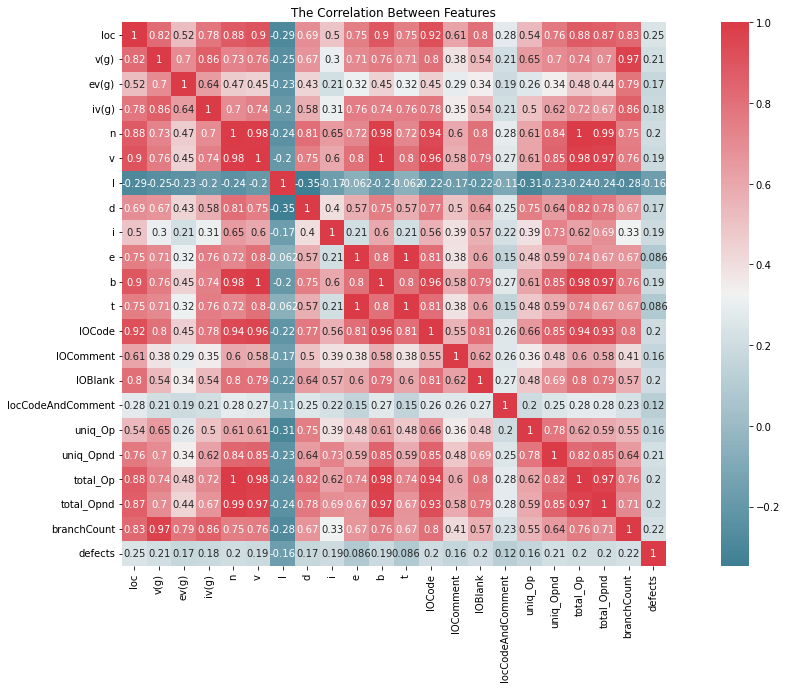

In [8]:
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True, square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

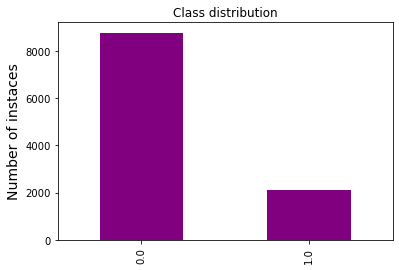

0.0    8777
1.0    2103
Name: defects, dtype: int64


In [9]:
# counting how many instances in each class
classDist = df['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

# printing the exact number of instances in each class
print (df['defects'].value_counts())

In [10]:
# spplitting the data into features and target class

x = df.iloc[:,:-1]
y=df['defects']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 8704 samples.
Testing set has 2176 samples.


In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Handling data imbalance
**Since our class distribution is very skewd, this may affect the results of the models, therfore, we will perform upsampling to solve this by taking as many instances of the minority class as much as the majority class, to make it balanced.**

In [13]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x, y, test_size = 0.2, random_state=42)
# concatenate training data back together
train = pd.concat([x_train2, y_train2], axis=1)

# separate minority and majority classes
not_defected = train[train.defects==0]
defected = train[train.defects==1]

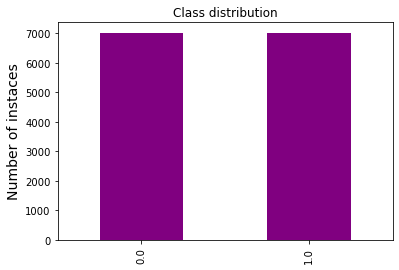

In [14]:
# upsample minority
defected_upsampled = resample(defected,
                          replace=True,
                          n_samples=len(not_defected), # match number in majority class
                          random_state=42) # reproducible results

upsampled = pd.concat([not_defected, defected_upsampled])
# check new class distribution
classDist = upsampled['defects'].value_counts().plot(kind = 'bar', color= ['purple'],title = 'Class distribution' )
classDist.set_ylabel("Number of instaces",fontsize=14)
plt.show()

In [15]:
upsampled.shape

(14040, 22)

In [16]:
upsampled.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
5528,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,38.77,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
8694,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,1468.01,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
10794,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,2481.67,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
4954,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
6181,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,22627.41,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [17]:
# exporting the new clean dataset to a csv file to be used in training the networks

from pathlib import Path  
filepath = Path(f'./newDataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
upsampled.to_csv(filepath)  

<h2>Multilayer perceptron

In [18]:
df3 = pd.read_csv('newDataset.csv')
df3.head()

,Unnamed: 0,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,5528,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
1,8694,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
2,10794,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
3,4954,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
4,6181,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [19]:
df3.drop('Unnamed: 0', axis = 1, inplace = True)

In [20]:
df3.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,38.77,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
1,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,1468.01,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
2,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,2481.67,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
3,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
4,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,22627.41,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [21]:
x3= df3.iloc[:,:-1]
y3=df3['defects']

In [22]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3, y3, test_size = 0.2, random_state=42)

<h2> Confussion Matrix function 

In [23]:
def ConfussionMatrix(Classifier, X_test, y_test):
    plot_confusion_matrix(Classifier, X_test, y_test)  
    plt.title('Confussion Matrix')
    plt.show()

<h2>Learning curve function

In [24]:
def LearningCurve(model,X, Y):
    train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(model, X, Y,cv=5,
                    scoring='accuracy',n_jobs=-1)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
    ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
    ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
    ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
    ax.set_xlabel('Data Range')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curve')
    plt.show()

<h2>MLP model with 5 hidden layers with number = 6 and relu activation function

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6,6,6,6,6), activation='relu', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21)

In [26]:
clf.fit(x_train3, y_train3)
y_predMLP = clf.predict(x_test3)

Iteration 1, loss = 2.00316106
Iteration 2, loss = 0.70860768
Iteration 3, loss = 0.66885623
Iteration 4, loss = 0.66728742
Iteration 5, loss = 0.65924133
Iteration 6, loss = 0.65165417
Iteration 7, loss = 0.66338097
Iteration 8, loss = 0.65617838
Iteration 9, loss = 0.64378635
Iteration 10, loss = 0.63888388
Iteration 11, loss = 0.68898054
Iteration 12, loss = 0.92591269
Iteration 13, loss = 0.64947625
Iteration 14, loss = 0.64738626
Iteration 15, loss = 0.64497893
Iteration 16, loss = 0.64240017
Iteration 17, loss = 0.64151063
Iteration 18, loss = 0.64025461
Iteration 19, loss = 0.63870893
Iteration 20, loss = 0.63740899
Iteration 21, loss = 0.63570135
Iteration 22, loss = 0.63767235
Iteration 23, loss = 0.63486052
Iteration 24, loss = 0.63346583
Iteration 25, loss = 0.63608787
Iteration 26, loss = 0.63468198
Iteration 27, loss = 0.63661631
Iteration 28, loss = 0.63583529
Iteration 29, loss = 0.63891725
Iteration 30, loss = 0.63245029
Iteration 31, loss = 0.63561653
Iteration 32, los

In [27]:
print("Accuracy on training set: {:.3f}".format(clf.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test3, y_test3)))

Accuracy on training set: 0.666
Accuracy on test set: 0.667


In [28]:
clfREP1 = classification_report(y_test3, y_predMLP, target_names=["0", "1"])
print(clfREP1)

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1409
           1       0.68      0.63      0.65      1399

    accuracy                           0.67      2808
   macro avg       0.67      0.67      0.67      2808
weighted avg       0.67      0.67      0.67      2808



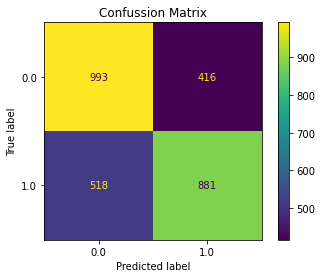

In [29]:
ConfussionMatrix(clf, x_test3, y_test3)

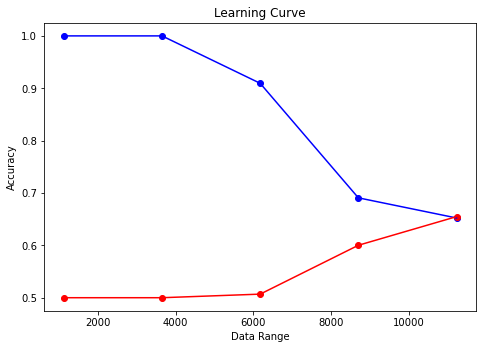

In [30]:
LearningCurve(clf, x3, y3)

<h2>MLP model with 4 hidden layers with weights 5, 10, 15 and 20 and tanh activation function

In [31]:
clf2 = MLPClassifier(hidden_layer_sizes=(5,10,15,20), activation='tanh', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21)
clf2.fit(x_train3, y_train3)
y_predMLP2 = clf2.predict(x_test3)

Iteration 1, loss = 0.68459159
Iteration 2, loss = 0.66078709
Iteration 3, loss = 0.66232808
Iteration 4, loss = 0.66213283
Iteration 5, loss = 0.66112711
Iteration 6, loss = 0.66074420
Iteration 7, loss = 0.65898758
Iteration 8, loss = 0.66007726
Iteration 9, loss = 0.65887629
Iteration 10, loss = 0.65744346
Iteration 11, loss = 0.65517844
Iteration 12, loss = 0.65682511
Iteration 13, loss = 0.65355708
Iteration 14, loss = 0.65261623
Iteration 15, loss = 0.66113723
Iteration 16, loss = 0.67444835
Iteration 17, loss = 0.67337691
Iteration 18, loss = 0.66738523
Iteration 19, loss = 0.66614558
Iteration 20, loss = 0.66351805
Iteration 21, loss = 0.66289738
Iteration 22, loss = 0.66204481
Iteration 23, loss = 0.66159292
Iteration 24, loss = 0.66079230
Iteration 25, loss = 0.66003126
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [32]:
print("Accuracy on training set: {:.3f}".format(clf2.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(clf2.score(x_test3, y_test3)))

Accuracy on training set: 0.539
Accuracy on test set: 0.534


In [33]:
clfRep = classification_report(y_test3, y_predMLP2, target_names=["0", "1"])
print(clfRep)

              precision    recall  f1-score   support

           0       0.52      0.95      0.67      1409
           1       0.70      0.11      0.19      1399

    accuracy                           0.53      2808
   macro avg       0.61      0.53      0.43      2808
weighted avg       0.61      0.53      0.43      2808



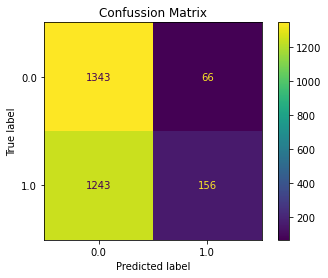

In [34]:
ConfussionMatrix(clf2, x_test3, y_test3)

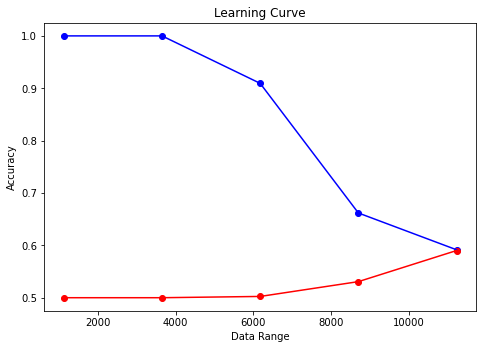

In [35]:
LearningCurve(clf2, x3, y3)

<h2>MLP model with 8 hidden layers with weights 20, 20, 20, 20, 20, 20, 20 and 20 and logistic activation function

In [36]:
clf3 = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20,20,20,20), activation='logistic', max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21)
clf3.fit(x_train3, y_train3)
y_predMLP3 = clf3.predict(x_test3)

Iteration 1, loss = 0.70186511
Iteration 2, loss = 0.69336821
Iteration 3, loss = 0.69330232
Iteration 4, loss = 0.69331014
Iteration 5, loss = 0.69314032
Iteration 6, loss = 0.69366420
Iteration 7, loss = 0.69325910
Iteration 8, loss = 0.69332186
Iteration 9, loss = 0.69328341
Iteration 10, loss = 0.69331081
Iteration 11, loss = 0.69343833
Iteration 12, loss = 0.69334851
Iteration 13, loss = 0.69327815
Iteration 14, loss = 0.69338697
Iteration 15, loss = 0.69332641
Iteration 16, loss = 0.69318937
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [37]:
print("Accuracy on training set: {:.3f}".format(clf3.score(x_train3, y_train3)))
print("Accuracy on test set: {:.3f}".format(clf3.score(x_test3, y_test3)))

Accuracy on training set: 0.500
Accuracy on test set: 0.502


In [38]:
clfRep3 = classification_report(y_test3, y_predMLP3 , target_names=["0", "1"])
print(clfRep3)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1409
           1       0.00      0.00      0.00      1399

    accuracy                           0.50      2808
   macro avg       0.25      0.50      0.33      2808
weighted avg       0.25      0.50      0.34      2808



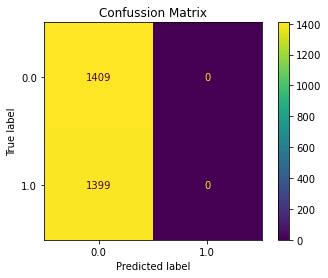

In [39]:
ConfussionMatrix(clf3, x_test3, y_test3)

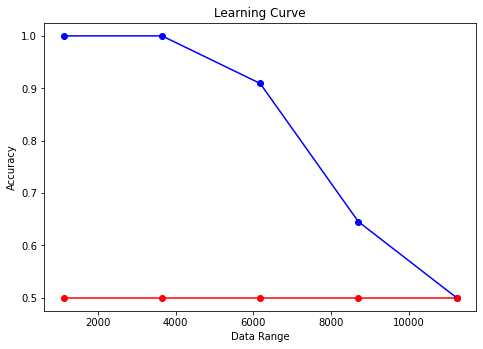

In [40]:
LearningCurve(clf3, x3, y3)

<h2>Comparison between the 3 models

<BarContainer object of 3 artists>

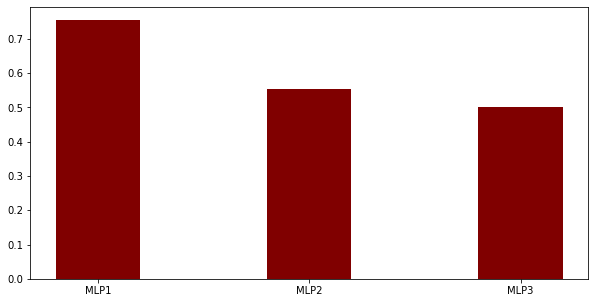

In [41]:
#visualization of the accuracies of the RF models in the 3 methods after the handling the data imbalance 
data = {'MLP1':0.666, 'MLP2': 0.539, 'MLP3':0.502}
names = list(data.keys())
acc = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, acc, color ='maroon',
        width = 0.4)

<h2>MLP model with 10 hidden layers and relu activation function 

In [42]:
model = tf.keras.models.Sequential(layers = None, name = None)

In [43]:
for i in range(1,10):
    model.add(tf.keras.layers.Dense(units=300, activation='relu'))

In [44]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy']  )

In [45]:
model.fit(x_train3, y_train3, batch_size=32, epochs=20)

Epoch 1/20
351/351 [==============================] - 4s 5ms/step - loss: 6.7137 - accuracy: 0.0000e+00
Epoch 2/20
351/351 [==============================] - 2s 5ms/step - loss: 6.5718 - accuracy: 0.0000e+00
Epoch 3/20
351/351 [==============================] - 2s 5ms/step - loss: 5.9223 - accuracy: 0.0000e+00
Epoch 4/20
351/351 [==============================] - 2s 5ms/step - loss: 5.3322 - accuracy: 8.9031e-05
Epoch 5/20
351/351 [==============================] - 2s 5ms/step - loss: 5.0901 - accuracy: 0.0000e+00
Epoch 6/20
351/351 [==============================] - 2s 5ms/step - loss: 6.4790 - accuracy: 0.0000e+00
Epoch 7/20
351/351 [==============================] - 2s 5ms/step - loss: 6.5224 - accuracy: 0.0000e+00
Epoch 8/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6462 - accuracy: 0.0000e+00
Epoch 9/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6324 - accuracy: 0.0000e+00
Epoch 10/20
351/351 [==============================] - 2s 5ms/st

<h2>MLP model with 10 hidden layers and tanh activation function 

In [46]:
model2 = tf.keras.models.Sequential(layers = None, name = None)

In [47]:
for i in range(1,10):
    model2.add(tf.keras.layers.Dense(units=6, activation='tanh'))

In [48]:
model2.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy']  )

In [49]:
model.fit(x_train3, y_train3, batch_size=32, epochs=20)

Epoch 1/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6215 - accuracy: 0.0000e+00
Epoch 2/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6174 - accuracy: 0.0000e+00
Epoch 3/20
351/351 [==============================] - 2s 4ms/step - loss: 6.6173 - accuracy: 0.0000e+00
Epoch 4/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6190 - accuracy: 0.0000e+00
Epoch 5/20
351/351 [==============================] - 2s 4ms/step - loss: 6.6164 - accuracy: 0.0000e+00
Epoch 6/20
351/351 [==============================] - 2s 4ms/step - loss: 6.6145 - accuracy: 0.0000e+00
Epoch 7/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6185 - accuracy: 0.0000e+00
Epoch 8/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6131 - accuracy: 0.0000e+00
Epoch 9/20
351/351 [==============================] - 2s 5ms/step - loss: 6.6133 - accuracy: 0.0000e+00
Epoch 10/20
351/351 [==============================] - 2s 5ms/st